In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
harry = open('/content/drive/MyDrive/Colab_Notebooks/book_rus.txt', encoding='cp1251').read()
potter = open('/content/drive/MyDrive/Colab_Notebooks/book.txt').read()

In [28]:
harry

'    \n   Джоан Кэтлин Роулинг \n   Гарри Поттер и философский камень \n    \n   Глава первая \n   Мальчик, который выжил \n    \n   Мистер и миссис Дарсли, из дома номер четыре по Бирючинному проезду, могли бы \nс гордостью сказать, что они, слава богу, совершенно нормальные люди. Они были \nбы последними, от кого вы могли бы ожидать участия в чем-нибудь странном и \nтаинственном, потому что они совершенно не одобряли подобной чепухи. \n   Мистер Дарсли работал директором фирмы Граннингз, которая выпускала сверла. Он \nбыл крупный, крепкий мужчина с очень короткой шеей и очень большими усами. \nМиссис Дарсли была худой и светловолосой, зато ее шеи с лихвой хватило бы на \nдвоих. Этим подарком природы она усердно пользовалась, большую часть времени \nшпионя за соседями через садовые изгороди. У Дарсли рос сын Дадли, и они были \nуверены, что лучшего мальчика не сыщешь на всем свете. \n   У Дарсли было все что нужно, но кроме того, у них была тайна, и больше всего \nони боялись, что кто

In [29]:
potter

'THE BOY WHO LIVED \n\nMr. and Mrs. Dursley, of number four, Privet Drive, \nwere proud to say that they were perfectly normal, \nthank you very much. They were the last people you’d \nexpect to be involved in anything strange or \nmysterious, because they just didn’t hold with such \nnonsense. \n\nMr. Dursley was the director of a firm called \nGrunnings, which made drills. He was a big, beefy \nman with hardly any neck, although he did have a \nvery large mustache. Mrs. Dursley was thin and \nblonde and had nearly twice the usual amount of \nneck, which came in very useful as she spent so \nmuch of her time craning over garden fences, spying \non the neighbors. The Dursley s had a small son \ncalled Dudley and in their opinion there was no finer \nboy anywhere. \n\nThe Dursleys had everything they wanted, but they \nalso had a secret, and their greatest fear was that \nsomebody would discover it. They didn’t think they \ncould bear it if anyone found out about the Potters. \nMrs. Pot

In [30]:
print ('Здравствуйте, Елена Евгеньевна')

Здравствуйте, Елена Евгеньевна


In [31]:
!pip install wordcloud

In [32]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

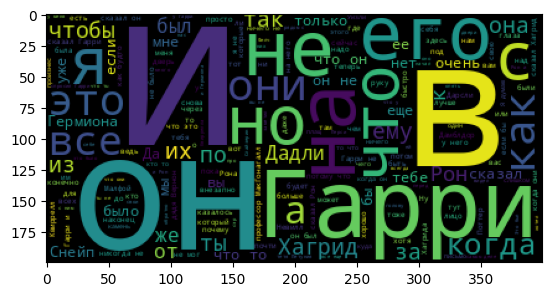

In [33]:
wc = WordCloud().generate(harry)

plt.imshow(wc)

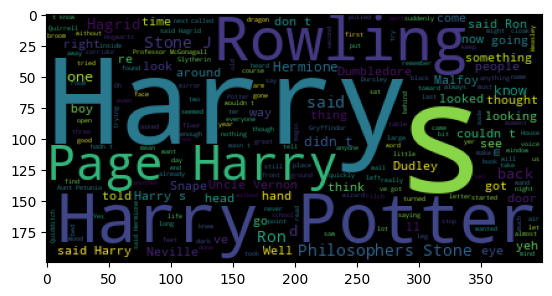

In [34]:
wc = WordCloud().generate(potter)

plt.imshow(wc)

В английском меньше слов, которые засоряют облако

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


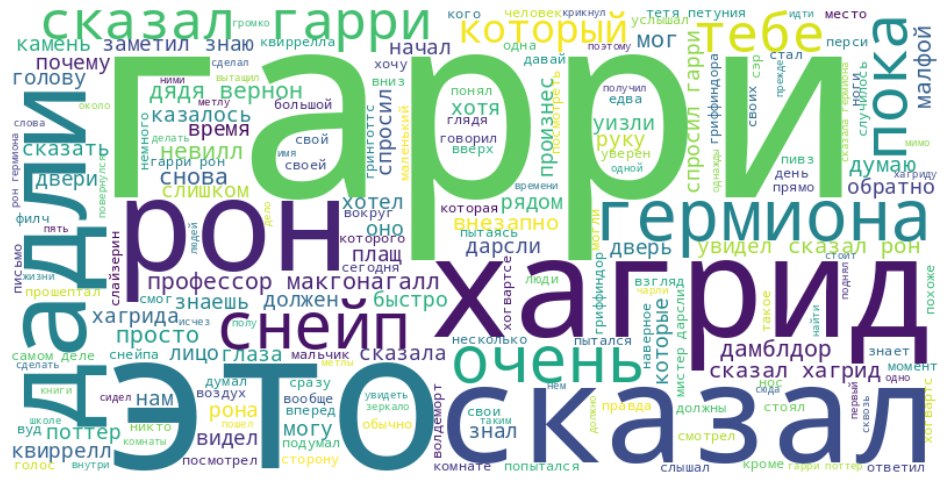

In [35]:
import re
import nltk
nltk.download('stopwords')

# 1. Очистка текста от всех символов, кроме букв
clean_text = re.sub(r'[^а-яёА-ЯЁ]', ' ', harry)

# 2. Приведение текста к нижнему регистру
lower_text = clean_text.lower()

# 3. Удаление стоп-слов
stop_words = set(stopwords.words('russian'))
words = lower_text.split()
filtered_words = [word for word in words if word not in stop_words]
filtered_text = ' '.join(filtered_words)

# 4. Построение облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Отображение облака слов
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
from collections import Counter
import seaborn as sns

counted = Counter(harry.split())
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_freq.head()

,word,frequency
247,-,2467
5,и,1869
43,в,1447
49,не,1319
80,на,1017


In [38]:
counted = Counter(filtered_words)
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_freq.head(10)

,word,frequency
3,гарри,1277
118,это,496
469,сказал,476
5372,рон,331
1091,хагрид,287
5870,гермиона,214
858,профессор,145
47,очень,142
73,дадли,140
6747,снейп,116


In [41]:
!pip install pymystem3

In [42]:
from pymystem3 import Mystem
import pymystem3
mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


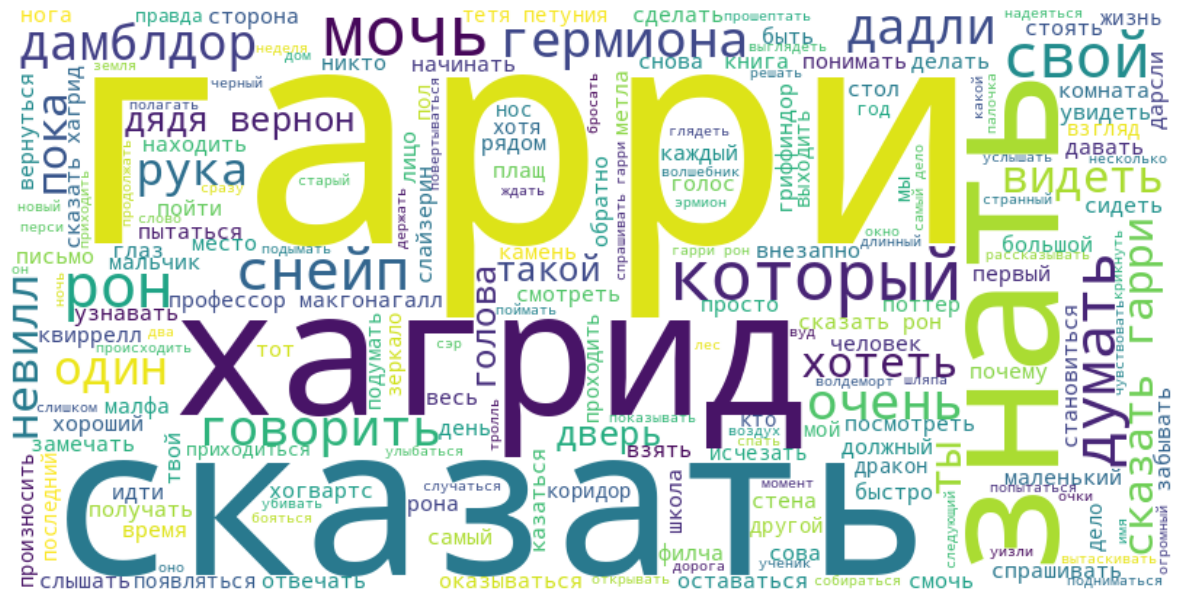

In [43]:
# 1. Очистка текста от всех символов, кроме букв
clean_text = re.sub(r'[^а-яёА-ЯЁ]', ' ', harry[:1_000_000])

# 2. Приведение текста к нижнему регистру
lower_text = clean_text.lower()

# 3. Удаление стоп-слов
stop_words = set(stopwords.words('russian'))
stop_words.add('это')
words = lower_text.split()
filtered_words = [word for word in words if word not in stop_words]
filtered_text = ' '.join(filtered_words)

# 4. Лемматизация текста
mystem = Mystem()
lemmatized_words = mystem.lemmatize(filtered_text)
# Удаляем лишние пробелы и символ переноса строки, оставшиеся после лемматизации
lemmatized_text = ''.join(lemmatized_words).replace('\n', ' ')

# 5. Построение облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

# Отображение облака слов
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
counted = Counter(lemmatized_words)
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_freq = word_freq.iloc[1:]

word_freq.head(10)

<Axes: xlabel='frequency', ylabel='word'>

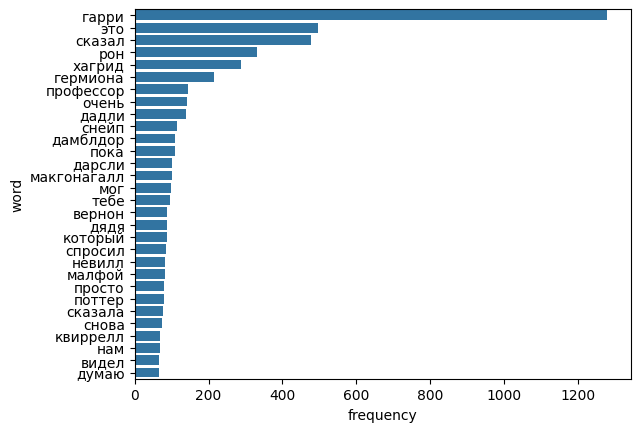

In [44]:
# create subplot of the different data frames
sns.barplot(x='frequency',y='word',data=word_freq.head(30))

In [45]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
fig = px.histogram(word_freq.head(30), x='word', y='frequency')
fig.show()